# Central Limit Theorem Application

## Introduction

In this assignment, you will investigate the Central Limit Theorem (CLT) using an exponentially distributed population. 
You will generate samples of different sizes from this population and examine how the distribution of sample means 
approaches a normal distribution as the sample size increases.

### Objectives
- Understand the exponential distribution and its properties.
- Explore the application of the CLT to the exponential distribution.
- Conduct hypothesis testing on the means of the samples.

## Instructions

Follow the tasks below to complete this assignment. Each task includes code placeholders and detailed prompts. 
Ensure you comment your code where appropriate.

### Task 1: Explore the Exponential Distribution

**Instructions:**
- Generate an exponentially distributed population with a mean of 2.0.
- Plot the histogram of the population.
- Compute and print the mean and standard deviation of the population.

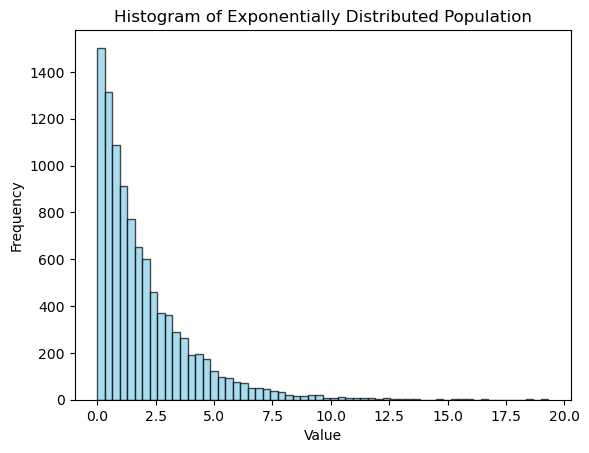

Mean : 1.9838193175190613 
STD  : 2.016791076139266


In [126]:
##### Importing all ibraries used in the assignment
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm  # to use the normal distribution for comparison
from scipy.stats import ttest_1samp # to import t_test

# Task 1: Generate Exponential Distribution
# Step 1: Generate population
mean = 2.0
exp = np.random.exponential(scale = mean, size = 10000)

# Step 2: Plot histogram
plt.hist(exp, bins = 60,color = 'skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Exponentially Distributed Population')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Saving the plot as an image file (adjust the path as needed)
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 2/screenshots/Exponential_Distribution.png"
plt.savefig(filename)

plt.show()

# Step 3: Calculate and print statistics

    # I used raw functions for mean and standard deviation
        ## mean statistic
def mean(data):
    n = len(data)
    total = 0
    for i in data:
        total += i
    return total / n

mean_stat = mean(exp)

        ## STD statistic
def std(data):
    mean_value = mean(data)  # Use the custom mean function
    inc = 0
    n = len(data)  # Number of data points
    for i in data:
        inc += (i - mean_value) ** 2
    return (inc / n) ** 0.5  # Population standard deviation formula

STD_stat = std(exp)

print(f"Mean : {mean_stat} \nSTD  : {STD_stat}")

### Task 2: Sample Means and CLT

**Instructions:**
- Draw random samples of sizes `n = 5, 30, 100` from the population.
- Compute the sample means for 10,000 samples at each sample size.
- Plot the histograms of sample means for each sample size.
- Compare the histograms to a normal distribution.

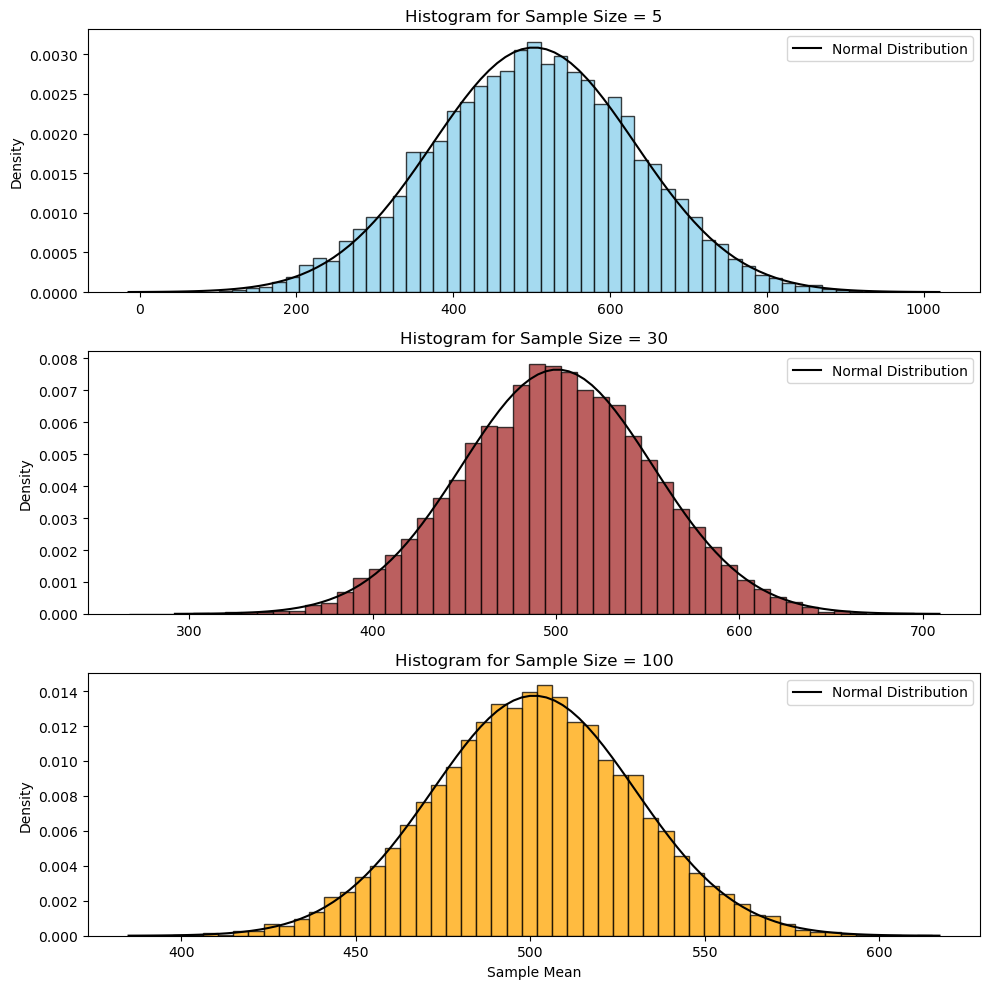

In [127]:
# Task 2: Sample Means and Central Limit Theorem (CLT)

# Step 1: Generate sample means
# Define the population: a range of numbers from 1 to 1000
tot_population = np.arange(1, 1001)

# Generate 10,000 samples for each sample size (n = 5, 30, 100)
# Using np.random.choice to randomly select data points from the population
sample_means1 = np.array([mean(np.random.choice(tot_population, size=5)) for looper in range(10000)])
sample_means2 = np.array([mean(np.random.choice(tot_population, size=30)) for looper in range(10000)])
sample_means3 = np.array([mean(np.random.choice(tot_population, size=100)) for looper in range(10000)])

# Step 2: Plot histograms and overlay normal distributions
# Create subplots for each sample size (5, 30, 100)
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Plot for sample size = 5
ax[0].set_title("Histogram for Sample Size = 5")  # Set the title for the first plot
ax[0].hist(sample_means1, bins=50, alpha=0.75, color='skyblue', edgecolor='black', density=True)  # Plot histogram
ax[0].set_ylabel('Density')  # Set the label for the y-axis

# Step 3: Overlay normal distribution for sample size = 5
# Calculate the mean and standard deviation of the sample means
mean1, std1 = mean(sample_means1), std(sample_means1)

# Generate x values to plot the normal distribution (from mean - 4*std to mean + 4*std)
x1 = np.linspace(mean1 - 4 * std1, mean1 + 4 * std1, 100)  # Ensure that almost all data is covered
ax[0].plot(x1, norm.pdf(x1, mean1, std1), color='black', label='Normal Distribution')  # Plot the normal curve
ax[0].legend()  # Show the legend

# Plot for sample size = 30
ax[1].set_title("Histogram for Sample Size = 30")  # Set the title for the second plot
ax[1].hist(sample_means2, bins=50, alpha=0.75, color='brown', edgecolor='black', density=True)  # Plot histogram
ax[1].set_ylabel('Density')  # Set the label for the y-axis

# Step 3: Overlay normal distribution for sample size = 30
# Calculate the mean and standard deviation of the sample means
mean2, std2 = mean(sample_means2), std(sample_means2)

# Generate x values for the normal distribution
x2 = np.linspace(mean2 - 4 * std2, mean2 + 4 * std2, 100)
ax[1].plot(x2, norm.pdf(x2, mean2, std2), color='black', label='Normal Distribution')  # Plot the normal curve
ax[1].legend()  # Show the legend

# Plot for sample size = 100
ax[2].set_title("Histogram for Sample Size = 100")  # Set the title for the third plot
ax[2].hist(sample_means3, bins=50, alpha=0.75, color='orange', edgecolor='black', density=True)  # Plot histogram
ax[2].set_xlabel('Sample Mean')  # Label the x-axis for the third plot
ax[2].set_ylabel('Density')  # Set the label for the y-axis

# Step 3: Overlay normal distribution for sample size = 100
# Calculate the mean and standard deviation of the sample means
mean3, std3 = mean(sample_means3), std(sample_means3)

# Generate x values for the normal distribution
x3 = np.linspace(mean3 - 4 * std3, mean3 + 4 * std3, 100)
ax[2].plot(x3, norm.pdf(x3, mean3, std3), color='black', label='Normal Distribution')  # Plot the normal curve
ax[2].legend()  # Show the legend

# Adjust layout for clarity (avoid overlapping of subplots)
plt.tight_layout()

# Saving the plot as an image file (adjust the path as needed)
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 2/screenshots/Histgrams_samples.png"
plt.savefig(filename)

# Display the plot
plt.show()

### Task 3: Hypothesis Testing

**Instructions:**
- Select a sample size of `n = 30`.
- Perform a hypothesis test to determine if the sample mean is significantly different from the population mean.
- Use a significance level of 0.05.

In [128]:
# Task 3: Hypothesis Testing

pop = np.arange(1,1001)
mean_pop = mean(pop)
alpha = 0.05

# Step 1: Generate a sample
sample = np.random.choice(pop, size = 30)
mean_samp = mean(sample)

# Step 2: Perform t-test
t_stat, p_value = ttest_1samp(sample, mean_pop)

# Step 3: Interpreting results
print(f"Population Mean: {mean_pop}\nSample Mean: {mean_samp}\nT-Statistic: {t_stat}\nP-Value: {p_value}")

    ## Checking the p-value resulted from t-test, and then decide the taken decision over Ho depending on the alpha value
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean differs significantly from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean does not show a statistically significant difference from the population mean.")

Population Mean: 500.5
Sample Mean: 483.6
T-Statistic: -0.3355483304626641
P-Value: 0.7396269568100643
Fail to reject the null hypothesis: The sample mean does not show a statistically significant difference from the population mean.


### Task 4: Comparing Distributions

**Objective**: Compare how the Central Limit Theorem applies to different population distributions.

**Instructions:**
1. Use three different distributions: Uniform, Exponential, and a heavy-tailed distribution (e.g., Pareto).
2. For each distribution, generate a population and calculate sample means for sample sizes $n = 10, 50, 100$.
3. Compare the histograms of the sample means for the three distributions.
4. Discuss how the shape of the original population distribution influences the convergence to a normal distribution.

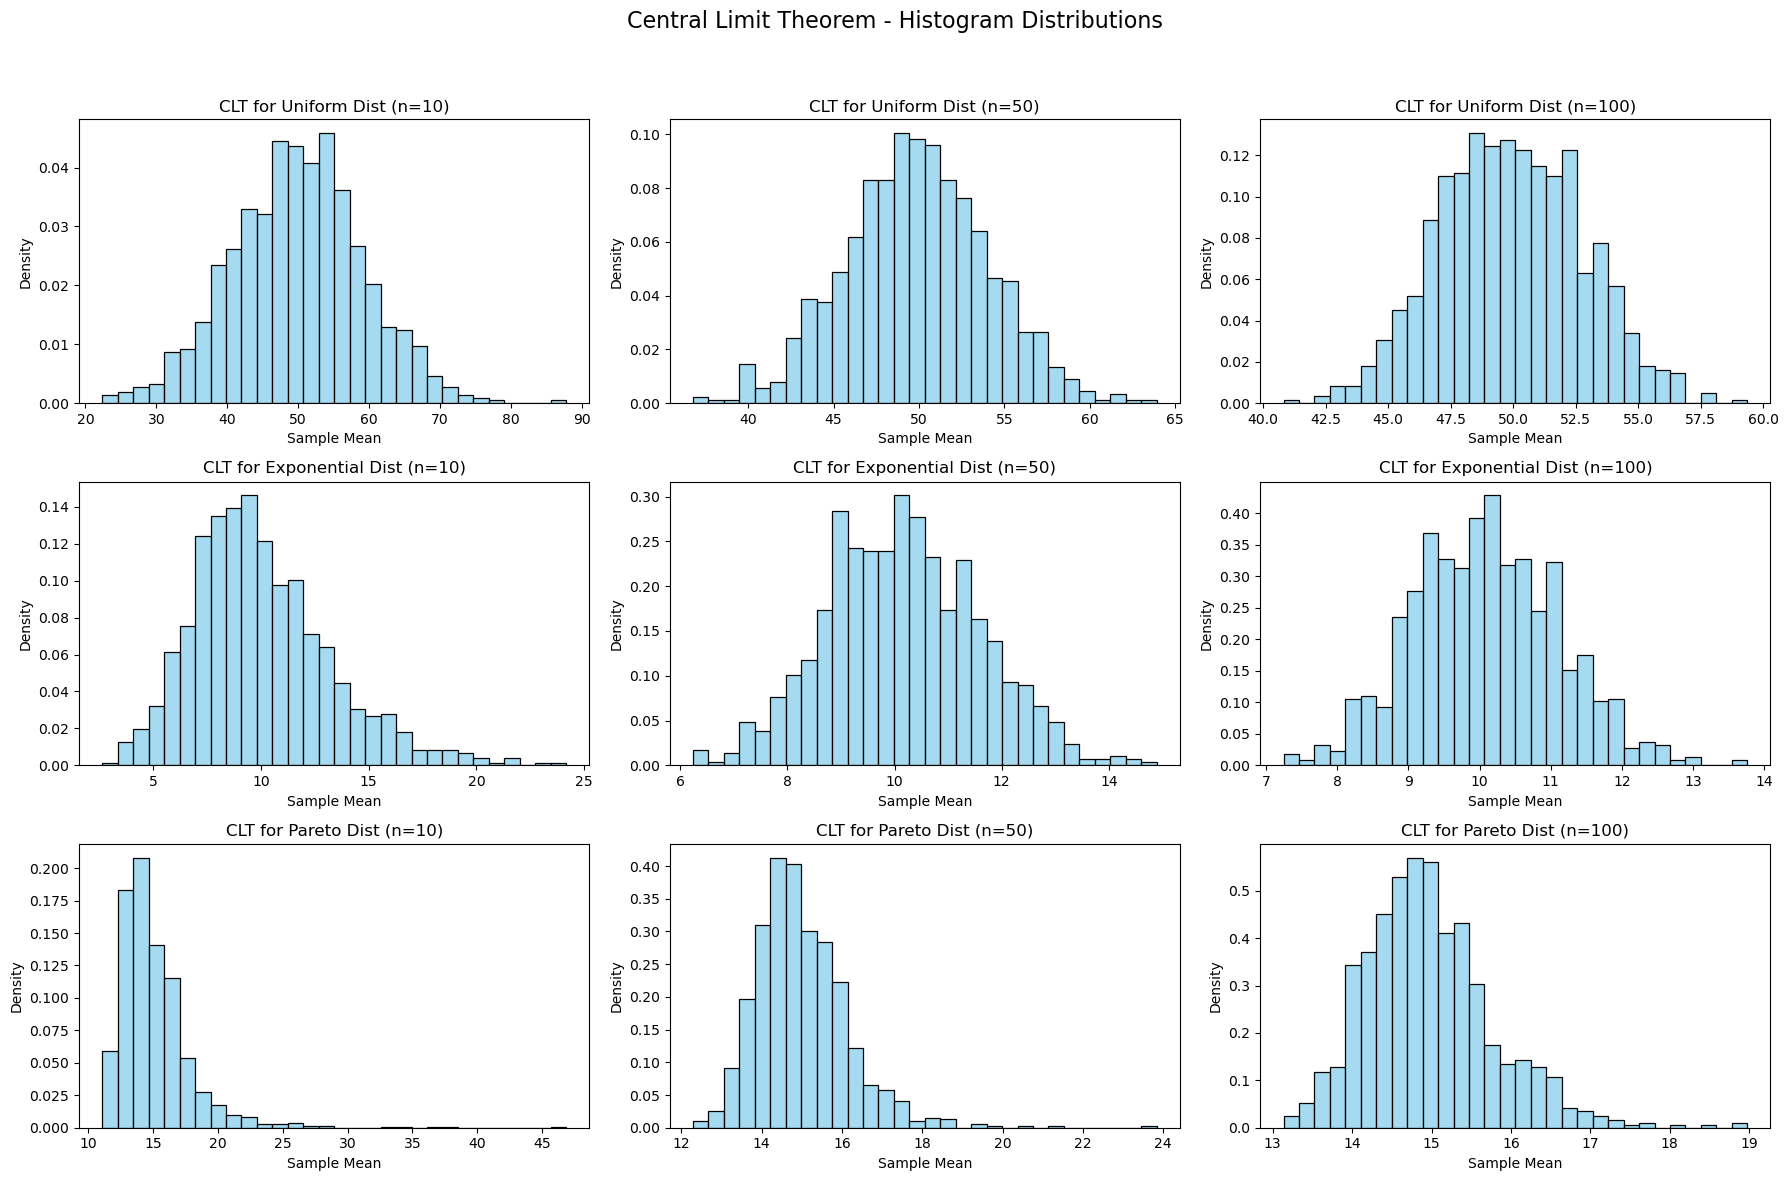

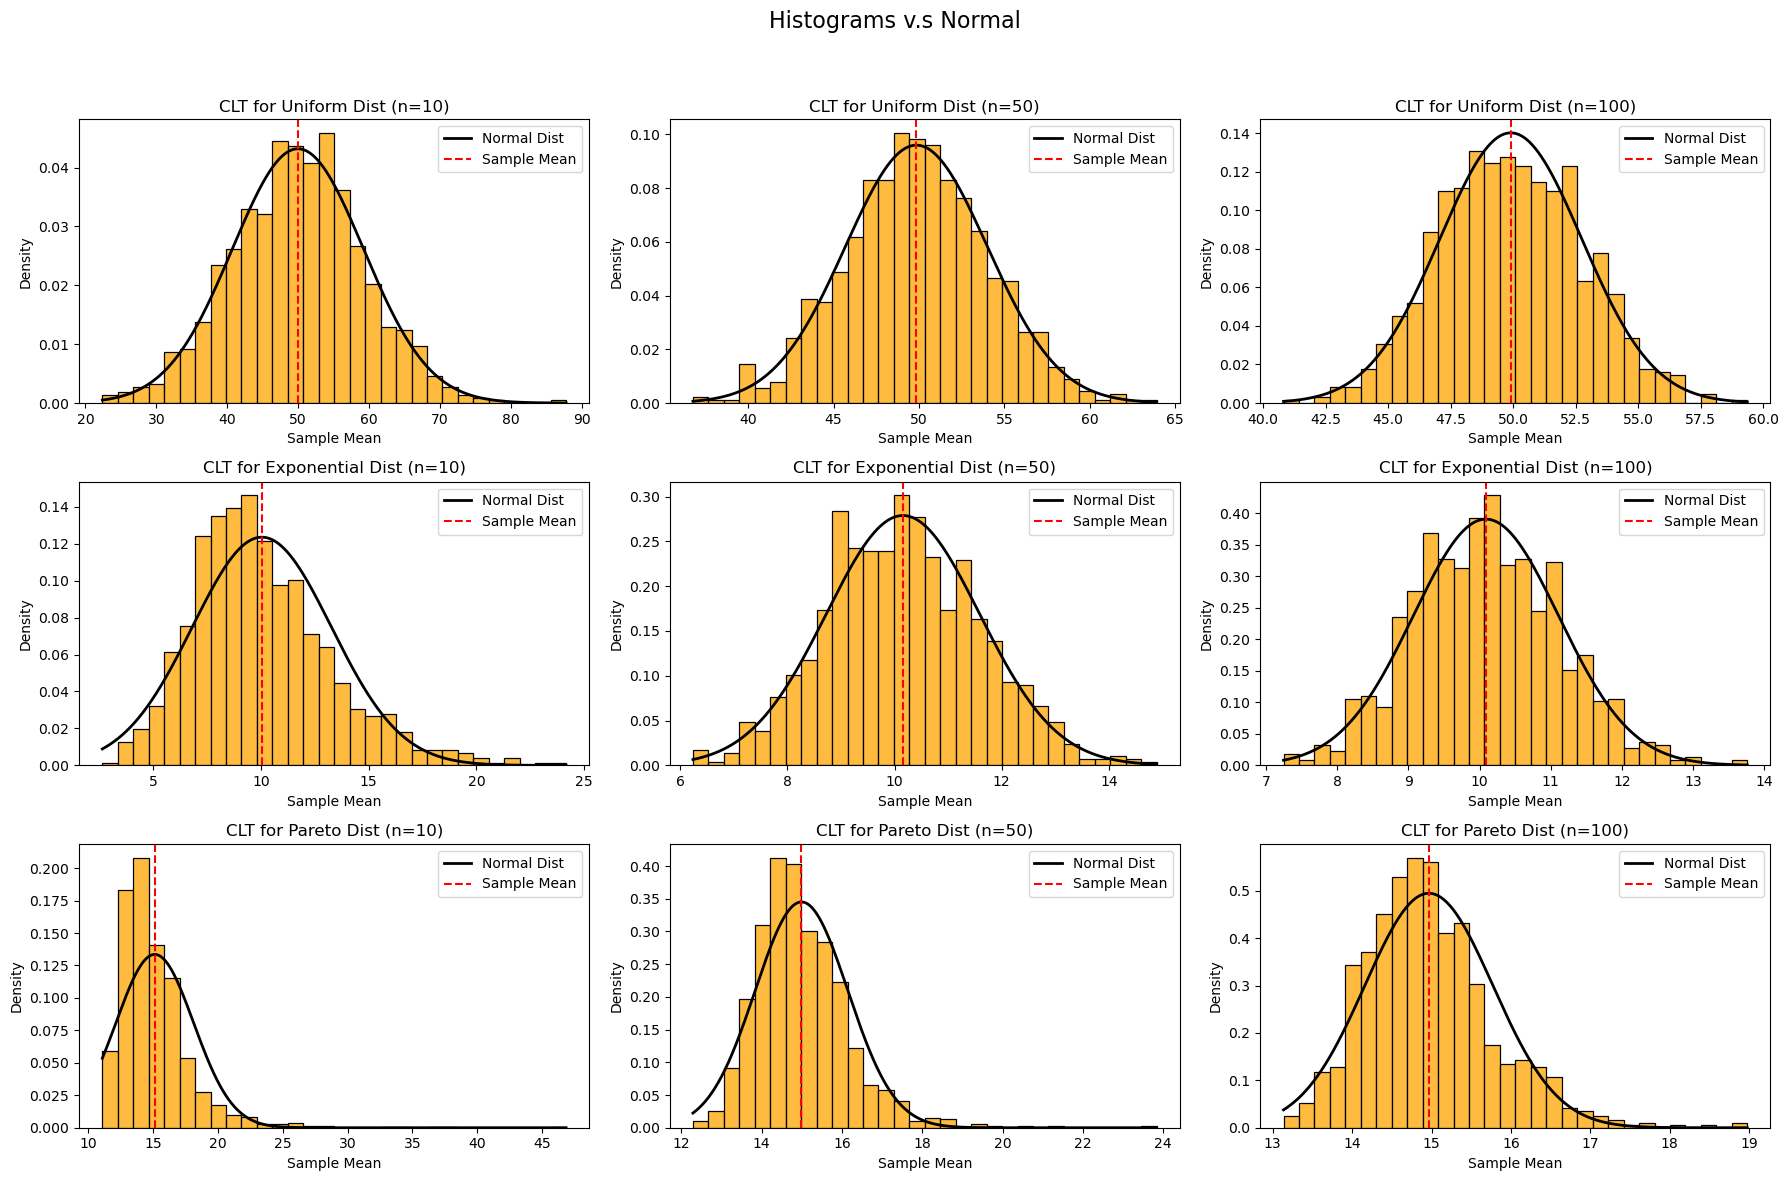

'\n   "Discussion of how the shape of the original population distribution influences the convergence to a normal distribution"\n   \n       1- Uniform Distribution:\n            - Distribution nature : the original population is symmetric ; therefore, when the sample size increases (n=10 --> 𝑛=100),the sample mean distributions rapidly converge to a normal distribution.\n            - Observation : we can conclude that symmetric populations naturally converge more quickly to normality under the Central Limit Theorem (CLT).\n\n       2- Exponantial Distribution\n            - Distribution nature : the original population is right-skewed ; therefore, when starting with small sample size n=10, distribution retains some skewness. However, when the sample size increases (from 10 to 100), the sample mean distributions smoothly converge to a normal distribution.\n            - Observation : we can conclude that skewed populations require larger sample sizes for the sample means to approach n

In [129]:
# Task 4: Comparing Distributions

## --> All needed distributions
    # 1- Uniform distribution
uniform_population = np.random.uniform(0, 100, size=100000)

    # 2- Exponential distribution
exponential_population = np.random.exponential(scale=10, size=100000)

    # 3- Pareto (heavy-tailed) distribution
pareto_population = (np.random.pareto(a=3, size=100000) + 1) * 10  # Adjust scale

# Step 2: generating a population and calculating sample means 

    # --> Function to calculate sample means as it will repeated several times and initializing sample sizes  𝑛=10,50,100
def sample_means(population, sample_size, num_samples=1000):
    sample_means = [mean(np.random.choice(population, sample_size, replace=False)) for looper in range(num_samples)]
    return sample_means

    # --> Sample sizes
sample_sizes = [10, 50, 100]

    # --> Calculating sample means for each population and each sample size
distributions = {"Uniform": uniform_population,"Exponential": exponential_population,"Pareto": pareto_population}
sample_means_data = {} 
for dist_name, pop in distributions.items():
    sample_means_data[dist_name] = {}  # Initialize an empty dictionary for each distribution
    # Loop over each sample size of 10,50,100 sizes
    for n in sample_sizes:
        # Calculate sample means for the given sample size and store it in the dictionary
        sample_means_data[dist_name][n] = sample_means(pop, n)
        # result --> # creating dictionry of dictionary of {dist1:{sample size : list of means ,..},dist2:{sample size : list of means ,..}}

# Step 3: Compare histograms of the sample means for the three distributions

    # --> defining a function to plot each subplot
def plot_histogram(ax, means, dist_name, n):
    sns.histplot(means, bins=30, color='skyblue', stat="density", ax=ax)
    ax.set_title(f"CLT for {dist_name} Dist (n={n})", fontsize=12)
    ax.set_xlabel("Sample Mean", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

    # --> Initializing the figure and axes grid
num_rows = len(sample_means_data)  # One row per distribution
num_cols = len(sample_sizes)       # One column per sample size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12), sharey=False)

    # --> Loop through distributions and sample sizes
for i, (dist_name, means_dict) in enumerate(sample_means_data.items()):
    for j, (n, means) in enumerate(means_dict.items()): # n : sample size, means : sample means list
        ax = axes[i, j] if num_rows > 1 else axes[j]  # Handle 1D axes array
        plot_histogram(ax, means, dist_name, n)

    # --> Set the overall title and adjust layout
fig.suptitle("Central Limit Theorem - Histogram Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
    # --> Saving the plot as an image file (adjust the path as needed)
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 2/screenshots/CLT_Histograms.png"
plt.savefig(filename)
plt.show()

# Step 4: Discuss how the shape of the original population distribution influences the convergence to a normal distribution
    # First: Compare the histograms to the normal distribution:
    
    # --> defining a function to plot each subplot
def plot_histogram_norm(ax, means, dist_name, n):
    m = mean(means)
    s = std(means)
    sns.histplot(means, bins=30, color='orange', stat="density", ax=ax)
        # Generate x-values for the normal distribution curve
    x = np.linspace(min(means), max(means), 1000)
    y = norm.pdf(x, loc=m, scale=s)  # Normal PDF with calculated mean and std
    ax.plot(x, y, color="black", label="Normal Dist", linewidth=2) # Plot the normal distribution curve
    ax.set_title(f"CLT for {dist_name} Dist (n={n})", fontsize=12)
    ax.set_xlabel("Sample Mean", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)
    ax.axvline(m, color="red", linestyle="--", label="Sample Mean")
    ax.legend()

    # --> Initializing the figure and axes grid
num_rows = len(sample_means_data)  # One row per distribution
num_cols = len(sample_sizes)       # One column per sample size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12), sharey=False)

    # --> Loop through distributions and sample sizes
for i, (dist_name, means_dict) in enumerate(sample_means_data.items()):
    for j, (n, means) in enumerate(means_dict.items()): # n : sample size, means : sample means list
        ax = axes[i, j] if num_rows > 1 else axes[j]  # Handle 1D axes array
        plot_histogram_norm(ax, means, dist_name, n)

    # --> Set the overall title and adjust layout
fig.suptitle("Histograms v.s Normal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
    # --> Saving the plot as an image file (adjust the path as needed)
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 2/screenshots/CLT_Comparison.png"
plt.savefig(filename)
plt.show()
    
      # Second: Main observations as below:
"""
   "Discussion of how the shape of the original population distribution influences the convergence to a normal distribution"
   
       1- Uniform Distribution:
            - Distribution nature : the original population is symmetric ; therefore, when the sample size increases (n=10 --> 𝑛=100),the sample mean distributions rapidly converge to a normal distribution.
            - Observation : we can conclude that symmetric populations naturally converge more quickly to normality under the Central Limit Theorem (CLT).

       2- Exponantial Distribution
            - Distribution nature : the original population is right-skewed ; therefore, when starting with small sample size n=10, distribution retains some skewness. However, when the sample size increases (from 10 to 100), the sample mean distributions smoothly converge to a normal distribution.
            - Observation : we can conclude that skewed populations require larger sample sizes for the sample means to approach normality.

       3- Pareto Distribution:
            - Distribution nature : the original population is highly skewed with a long tail (heavy-tailed distribution); therefore, when starting with small sample size n=10, distribution retains some skewness. When increaseing n (from 10 to 100), the sample means begin to approximate a normal distribution
            - Observation : we notice this convergence occurs more gradually compared to the Exponential distribution, and Heavy-tailed distributions converge more slowly to normality.

    In conclusion, 
        - Symmetric distributions (e.g., Uniform) require fewer samples for the sample mean to approximate normality.
        - Distributions with higher skewness (e.g., Exponential) require larger sample sizes to mitigate the impact of skewness on the sample mean.
        - Heavy-tailed distributions (e.g., Pareto) converge more slowly due to the stronger influence of outliers on the sample mean.
"""

### Task 5: Impact of Sample Size

**Objective**: Explore the impact of sample size on the accuracy of statistical inference.

**Instructions:**
1. Generate sample means for $n = 10, 30, 50, 100, 500$.
2. Calculate the standard error of the mean (SEM) for each sample size.
3. Plot the SEM against sample size and discuss the relationship.
4. Explain how the CLT justifies this relationship.

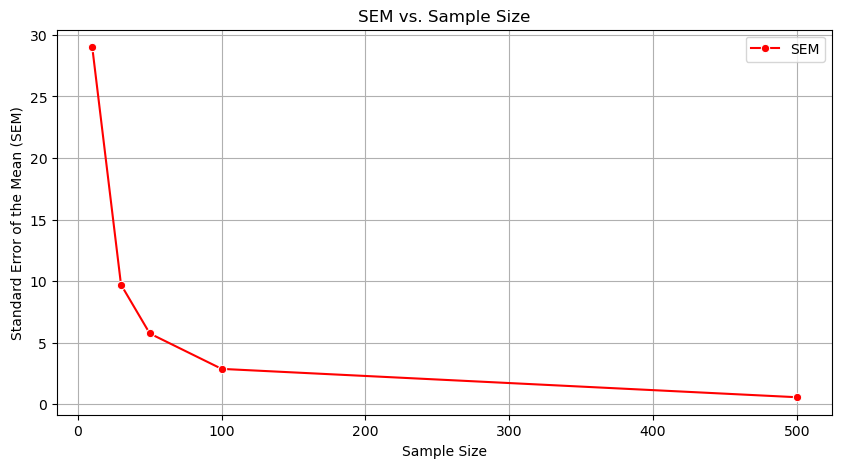

'\n    Main Observation : whenever the sample size (n) is growing, the standard error of the mean (SEM) is decreasing.\n                       This declares the effect of CLT clearly as The distribution of sample means converges toward \n                       a normal distribution and a standard deviation (SEM) which is decreasing as well proportionally \n                       to the square root of the sample size. Briefly, larger sample sizes yield more precise estimates\n                       of the population mean, with reduced variability (SEM) in those estimates.\n'

In [130]:
# Task 5: Impact of Sample Size

# Step 1 & Step 2 : Generate sample means and calculate SEM for each sample size

    # -->  Define the population (values from 1 to 1000)
population_data = np.arange(1, 1001)

    # --> Calculate the population mean and standard deviation
population_mean = np.mean(population_data)
population_std = np.std(population_data)

    # --> Define sample sizes to explore
sample_sizes = [10, 30, 50, 100, 500]
num_samples = 10000
    # --> List to store SEM values for each sample size
sem_values = []

    # --> Looping over the sample sizes to calculate the sample means, STD, SEM
for i in sample_sizes:
    # Generate 1000 samples of size n from the population
    sample_means =np.array([mean(np.random.choice(population_data, i, replace=True)) for looper in range(num_samples)])
    s = std(sample_means)  # std of the sample means
    sem = s / (i ** 0.5) # calculating the SEM
    sem_values.append(sem)

# Step 3: Plot SEM against sample size
plt.figure(figsize=(10, 5))
sns.lineplot(x=sample_sizes, y= sem_values, marker='o', linestyle='-', color='r', label='SEM')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error of the Mean (SEM)')
plt.title('SEM vs. Sample Size')
plt.grid(True)
plt.legend()
filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 2/screenshots/SEM.png"
plt.savefig(filename)
plt.show()

# Step 4:  Explain how the CLT justifies this relationship

"""
    Main Observation : whenever the sample size (n) is growing, the standard error of the mean (SEM) is decreasing.
                       This declares the effect of CLT clearly as The distribution of sample means converges toward 
                       a normal distribution and a standard deviation (SEM) which is decreasing as well proportionally 
                       to the square root of the sample size. Briefly, larger sample sizes yield more precise estimates
                       of the population mean, with reduced variability (SEM) in those estimates.
"""

### Task 6: Working with Real-World Datasets

**Objective**: Apply the Central Limit Theorem to a real-world dataset to validate its application.

**Instructions:**
1. Load a real-world dataset (e.g., from `seaborn` or a CSV file).
2. Select a numeric column to analyze (e.g., `age`, `income`).
3. Randomly sample subsets of the data and compute the mean of the selected column for each subset.
4. Plot the histogram of the sample means and overlay it with a normal distribution curve.
5. Discuss how the CLT applies to the dataset and any potential limitations.


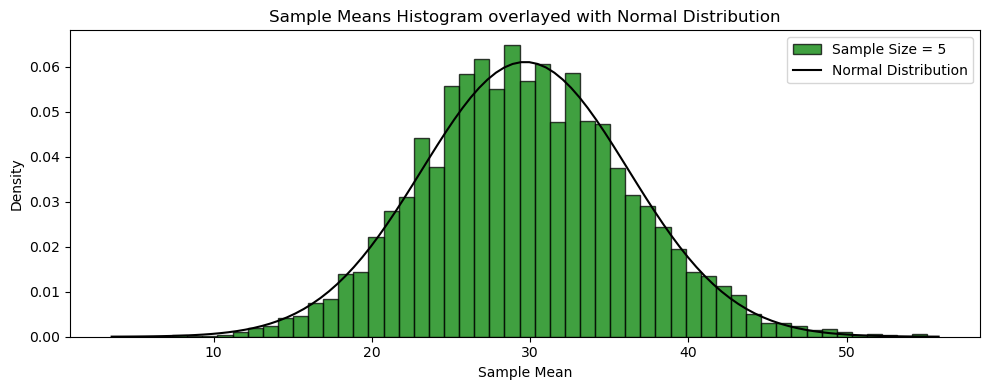

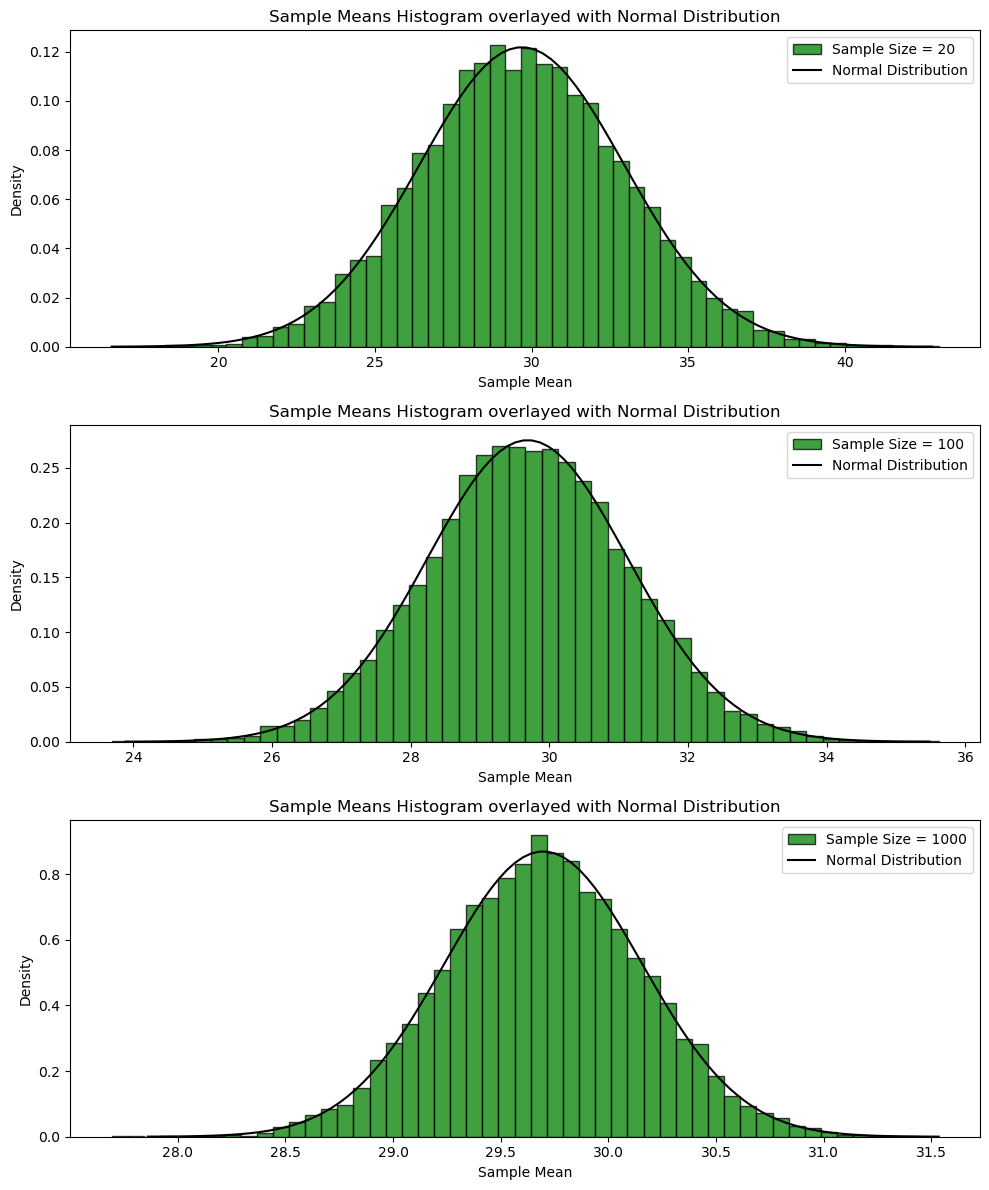

'\n    Discuss how the CLT applies to the dataset and any potential limitations:-\n    \n    CLT Discussion:-\n        - Noting that the histogram of sample means approximates a normal distribution, confirming CLT.\n        - Despite the original data distribution, the sample means follow a normal distribution as sample size increases.\n        - Validating this point with different increasing sample_sizes list as used, graphs show normal distribution tendency,\n          after increasing sample_size.\n        - Larger sample sizes lead to more accurate estimates and a tighter distribution of sample means.\n          \n    Potential limitations:\n        - Outliers in the population can distort sample means, especially with small samples.\n        - Whenever sample sizes are getting smaller, this can lead to less precise approximations.\n        - Additionally, random sampling is essential to prevent biases or errors in the sample means.\n'

In [131]:
# Step 1: Load the dataset ( choose any dataset)
# Example: Using seaborn's Titanic dataset
# Loading the Titanic dataset
df = sns.load_dataset('titanic')
population = df.age.dropna()  # Drop missing values values

# Step 2, 3, 4, 5 are included in the function for the code coordinations as below
# Function to compute sample means for varying sample sizes and plot histograms
def plotter(population_data, sample_sizes, num_samples):
    """
    Function to compute sample means for varying sample sizes and plot histograms with normal distribution curves.

    Parameters:
    - population_data: array-like, the population data to sample from.
    - sample_sizes: list, sample sizes for which histograms will be plotted.
    - num_samples: int, number of random samples to draw for each sample size.

    Returns:
    - None, but plots histograms of sample means with overlaid normal distribution curves.
    """
    fig, axes = plt.subplots(len(sample_sizes), 1, figsize=(10, len(sample_sizes) * 4))
    
    # Ensure axes is iterable for a single subplot
    if len(sample_sizes) == 1:
        axes = [axes]
    
    for idx, n in enumerate(sample_sizes):
        # Step 2: Sample subsets and compute means
        sample_means = np.array([mean(np.random.choice(population_data, n, replace=True)) for _ in range(num_samples)])
        
        # Step 3: Plot histogram of sample means
        axes[idx].hist(sample_means, bins=50, alpha=0.75, color='green', edgecolor='black', density=True, label=f'Sample Size = {n}')
        
        # Step 4: Overlay normal distribution curve
        mean_val, std_val = mean(sample_means), std(sample_means)
        x = np.linspace(mean_val - 4 * std_val, mean_val + 4 * std_val, 100)
        axes[idx].plot(x, norm.pdf(x, mean_val, std_val), color='black', label='Normal Distribution')
        
        # Step 5: Annotate the plot
        axes[idx].set_title(f"Sample Means Histogram overlayed with Normal Distribution")
        axes[idx].set_xlabel('Sample Mean')
        axes[idx].set_ylabel('Density')
        axes[idx].legend()
    filename = f"D:/Other/1- Masters Data/1- ML Course/Assignments/Assignment 2/screenshots/Real_data_observation.png"
    plt.savefig(filename)
    plt.tight_layout()
    plt.show()

# Calling the plotter function with sample size 5 and 10,000 repetitions
plotter(population, sample_sizes=[5], num_samples=10000)

# Validating CLT using different increasing sample_sizes list, to highlight the main observations
plotter(population, sample_sizes=[20,100,1000], num_samples=10000)

"""
    Discuss how the CLT applies to the dataset and any potential limitations:-
    
    CLT Discussion:-
        - Noting that the histogram of sample means approximates a normal distribution, confirming CLT.
        - Despite the original data distribution, the sample means follow a normal distribution as sample size increases.
        - Validating this point with different increasing sample_sizes list as used, graphs show normal distribution tendency,
          after increasing sample_size.
        - Larger sample sizes lead to more accurate estimates and a tighter distribution of sample means.
          
    Potential limitations:
        - Outliers in the population can distort sample means, especially with small samples.
        - Whenever sample sizes are getting smaller, this can lead to less precise approximations.
        - Additionally, random sampling is essential to prevent biases or errors in the sample means.
"""

## Submission Guidelines

- Ensure all code cells are executed and outputs are visible.
- Submit the completed notebook as `Assignment_2_CLT.ipynb`.
- Include your **Name** and **ID** at the top.